In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

In [4]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [5]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       [5., 1., 2., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.]])

# Calculating the Joint Probability

### The Dot Product

In [6]:
a = np.array([1,2,3])
b = np.array([0,5,4])

In [7]:
a.dot(b)
#1*0+2*5+

22

In [8]:
c = np.array([[0,6], [3,0], [5,1]])

In [18]:
a.dot(c)


array([21,  9])

In [19]:
a.dot(c).shape

(2,)

In [20]:
X_test.shape

(1723, 2500)

In [21]:
prob_token_spam.shape

(2500,)

In [24]:
X_test.dot(prob_token_spam).shape

(1723,)

## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$$

In [31]:
PROB_SPAM = 0.31116

In [32]:
np.log(prob_token_spam)

array([ -4.70348234,  -5.31318053,  -4.97907236, ..., -10.10897108,
        -9.54935529,  -9.88582753])

# Joint probability in log format

In [33]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)- np.log(prob_all_tokens))+np.log(PROB_SPAM)

In [34]:
joint_log_spam[:5]

array([  3.27718466,  15.72138436,  19.5582266 , -16.39794301,
        28.64561835])

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$

In [35]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [36]:
joint_log_ham[:5]

array([-11.08238401, -40.12907657, -38.4866222 ,  -2.88325684,
       -60.6413905 ])

# Making Predictions

### Checking for higher probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center>OR</center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [37]:
prediction = joint_log_spam > joint_log_ham

In [42]:
prediction[-5:]*1

# This *1 converts boolean into integers

array([0, 0, 0, 0, 0])

# Simplify

$$P(X \, | \, Spam) \, P(Spam) ≠  \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [45]:
joint_log_spam = X_test.dot(np.log(prob_token_spam))+np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

#Probability of an email being spam or non spam does not depent on probability of the token occuring

# Metrics and Evaluation

## Accuracy

In [48]:
correct_doc = (y_test == prediction).sum()

In [51]:
print('Docs classified correctly:', correct_doc)

Docs classified correctly: 1673


In [58]:
numdocs_wrong = X_test.shape[0] - correct_doc
print('Docs classified incorrectly', numdocs_wrong)

#Only 50 classified incorrectly, yayyyyy

Docs classified incorrectly 50


In [59]:
#Accuracy
correct_doc/len(X_test)

0.9709808473592572

In [63]:
fraction_wrong = numdocs_wrong/len(X_test)


In [64]:
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.90%
Accuracy of the model is 97.10%


## Visualising the results

In [72]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

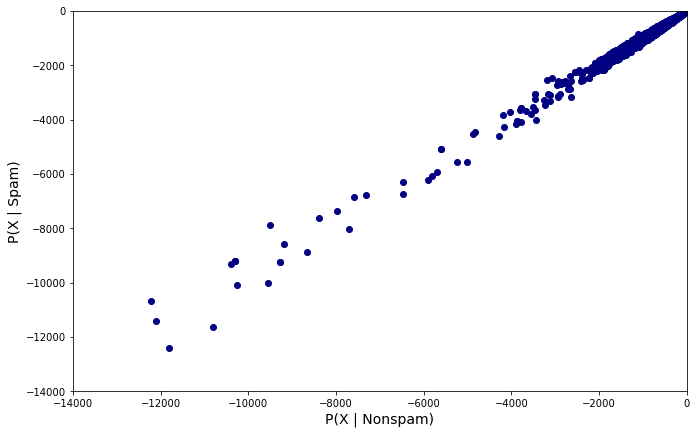

In [71]:
plt.figure(figsize = (11,7))
plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color= 'navy')
plt.show()

# The Decision Boundary

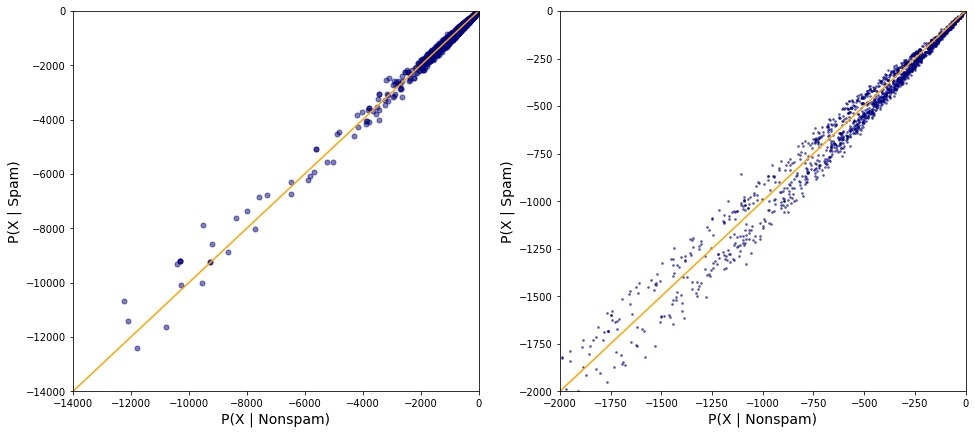

In [80]:
plt.figure(figsize = (16,7))

plt.subplot(1, 2, 1)
plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

plt.xlim([-14000, 1])
plt.ylim([-14000, 1])
plt.plot(linedata, linedata, color = 'orange')

plt.scatter(joint_log_ham, joint_log_spam, color= 'navy', alpha = 0.5, s = 25)

plt.subplot(1, 2, 2)
plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])
plt.plot(linedata, linedata, color = 'orange')

plt.scatter(joint_log_ham, joint_log_spam, color= 'navy', alpha = 0.5, s = 3)

plt.show()

In [89]:
#To make our charts more visual we need to use Seaborn
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})
#Seaborn works well with DataFrames, hence we created one

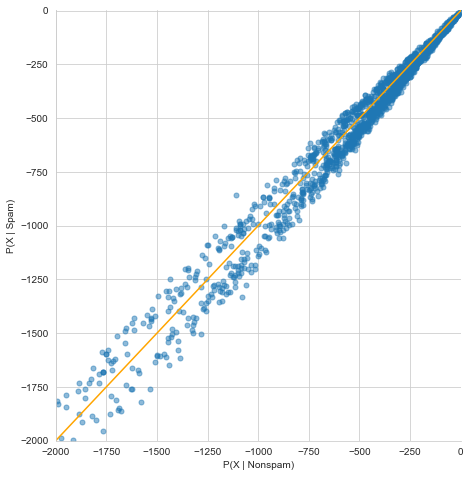

In [92]:

sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, height = 6.5, fit_reg=False, 
           scatter_kws={'alpha':0.5, 's':25})
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])
plt.plot(linedata, linedata, color = 'orange')

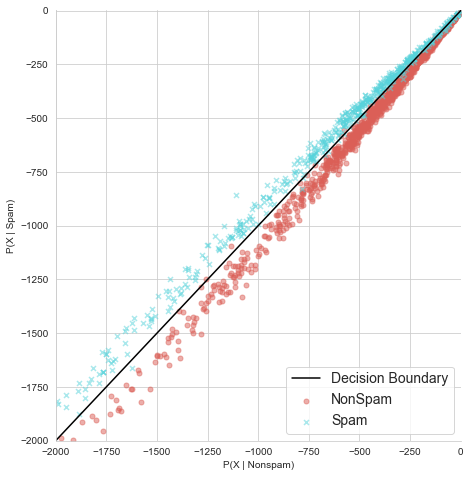

In [103]:

sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, height = 6.5, fit_reg=False, legend = False,
           scatter_kws={'alpha':0.5, 's':25}, hue = labels, markers=['o', 'x'], palette = 'hls')
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])
plt.plot(linedata, linedata, color = 'black')
plt.legend(('Decision Boundary', 'NonSpam', 'Spam'), loc = 'lower right', fontsize = 14)


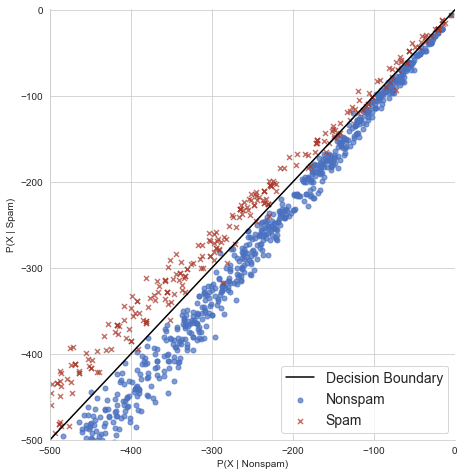

In [106]:
# Making a customised color pallete and zooming in further

my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)



### False Positives and False Negatives

In [107]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1167,  556]))

In [110]:
true_pos = (y_test == 1) & (prediction == 1)

In [113]:
true_pos.sum()

547

In [114]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

9

In [115]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

41

In [116]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 93.03%


In [119]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.2%}'.format(precision_score))

Precision score is 98.38%


In [120]:
# Very Often there is a tradeoff between recall and precision 
#Think more on this

## F-Score or F1 Score

In [123]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.96


In [124]:
# F score is the harmonic mean of Recall and Precision, hence it takes both false positives 
# and false negatives into account